In [1]:
#데이터 읽기
from sklearn.datasets import load_boston

boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
import pandas as pd

boston_pd=pd.DataFrame(boston.data, columns=boston.feature_names)
boston_pd['PRICE']=boston.target

boston_pd.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [5]:
#price에 대한 histogram
import plotly.express as px

fig=px.histogram(boston_pd,x='PRICE')
fig.show()

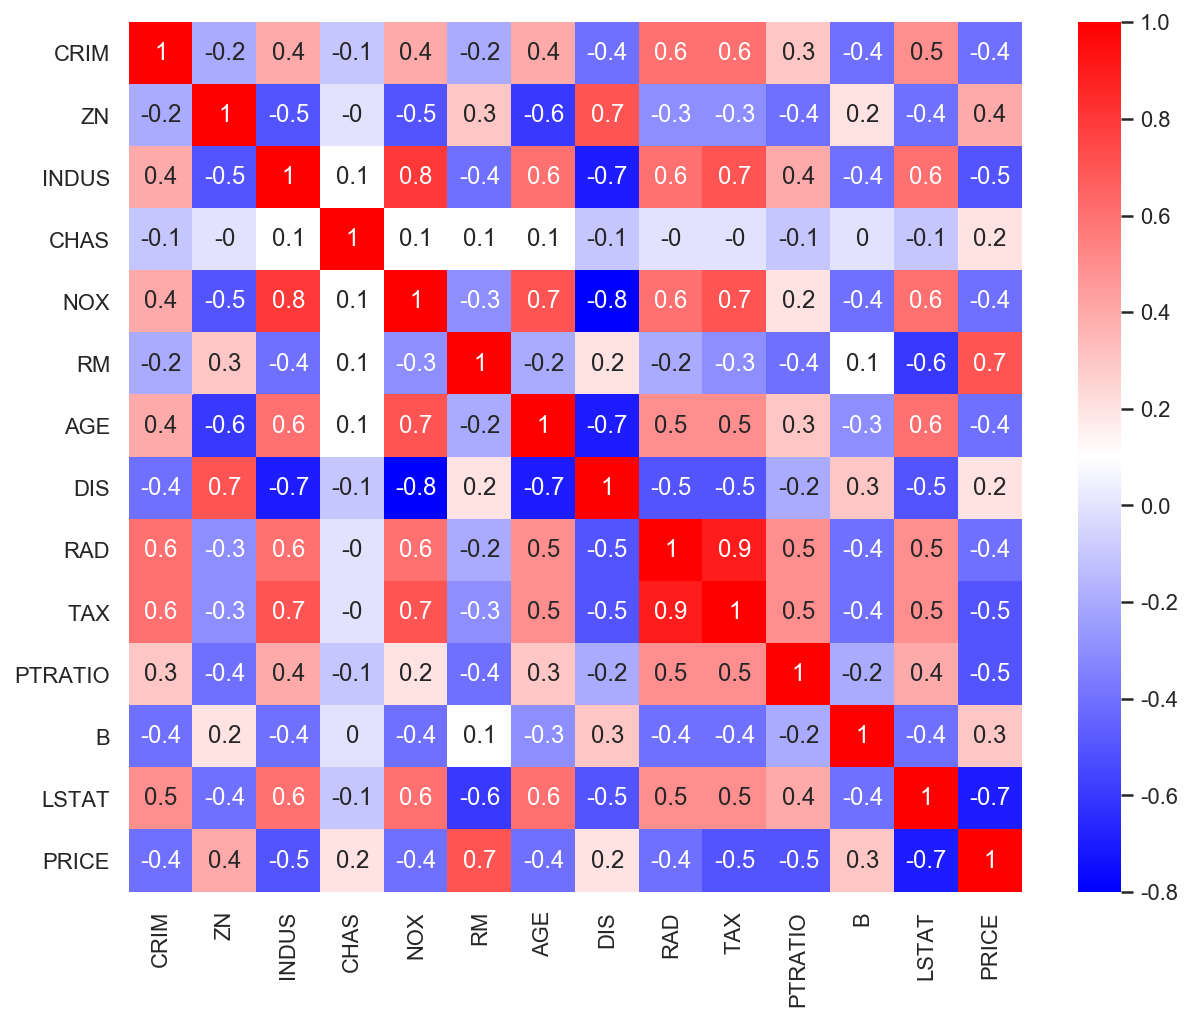

In [10]:
#각 특성별 상관계수 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr_mat=boston_pd.corr().round(1)
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data=corr_mat,annot=True,cmap='bwr')

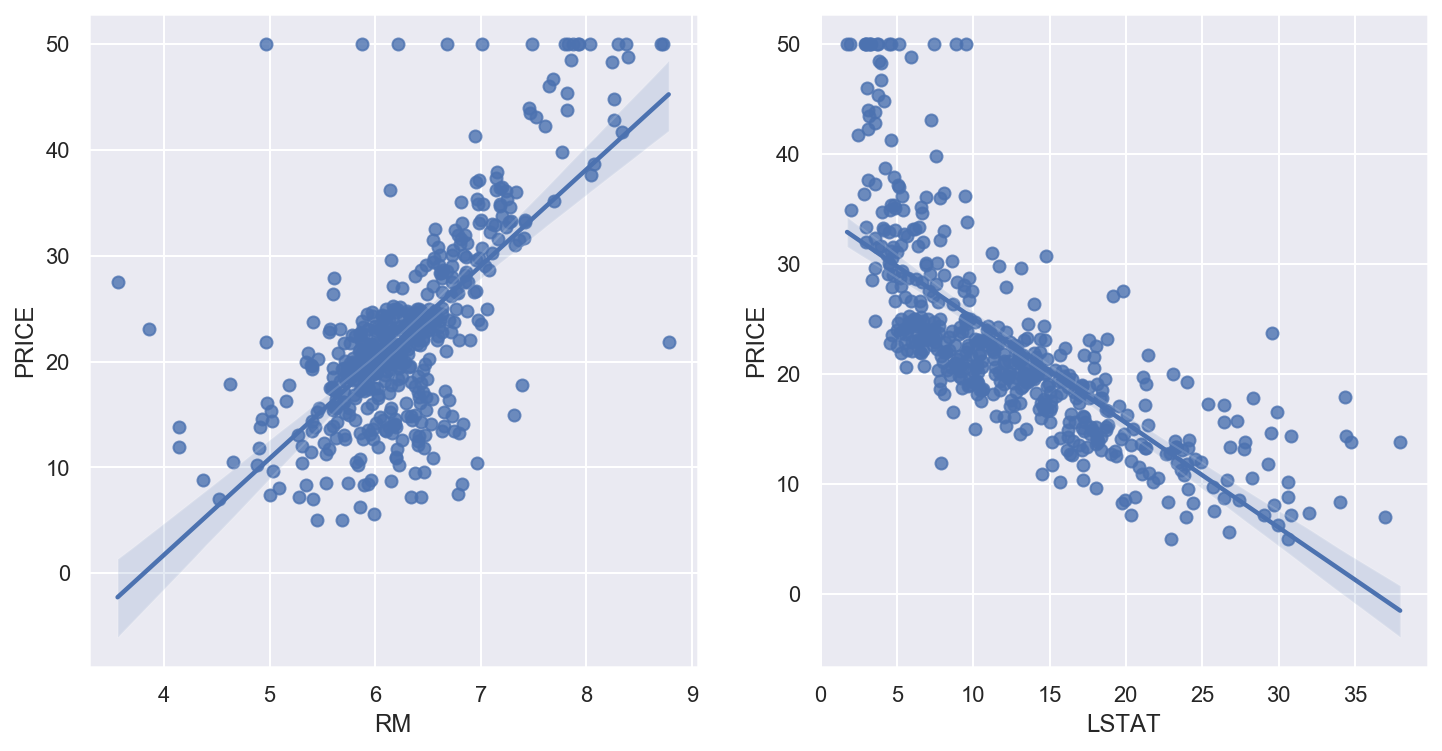

In [12]:
#RM,LSTAT이 PRICE와 높은 상관관계를 가지고 있으니, 더 자세히 관찰해보겠음
#RM : 방의 갯수가 많을 수록 집값이 높아진다.
#LSTAT :저소득층의 인구가 낮을 수록 집값이 높아진다? 집값이 높아서 저소득층이 적은것은 아닐까?
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})
fig,ax=plt.subplots(ncols=2)
sns.regplot(x='RM',y='PRICE',data=boston_pd, ax=ax[0])
sns.regplot(x='LSTAT',y='PRICE',data=boston_pd, ax=ax[1])

In [14]:
#train,test set 분리
from sklearn.model_selection import train_test_split

X=boston_pd.drop(['PRICE'],axis=1)
y=boston_pd['PRICE']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)

In [15]:
#linear regression 
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#모델 평가
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr=reg.predict(X_train)
pred_te=reg.predict(X_test)
rmse_tr=(np.sqrt(mean_squared_error(y_train,pred_tr)))
rmse_te=(np.sqrt(mean_squared_error(y_test,pred_te)))

print('RMSE of Train Data : ',rmse_tr)
print('RMSE of Test Data : ',rmse_te)

RMSE of Train Data :  4.577673729304953
RMSE of Test Data :  5.163575054895318


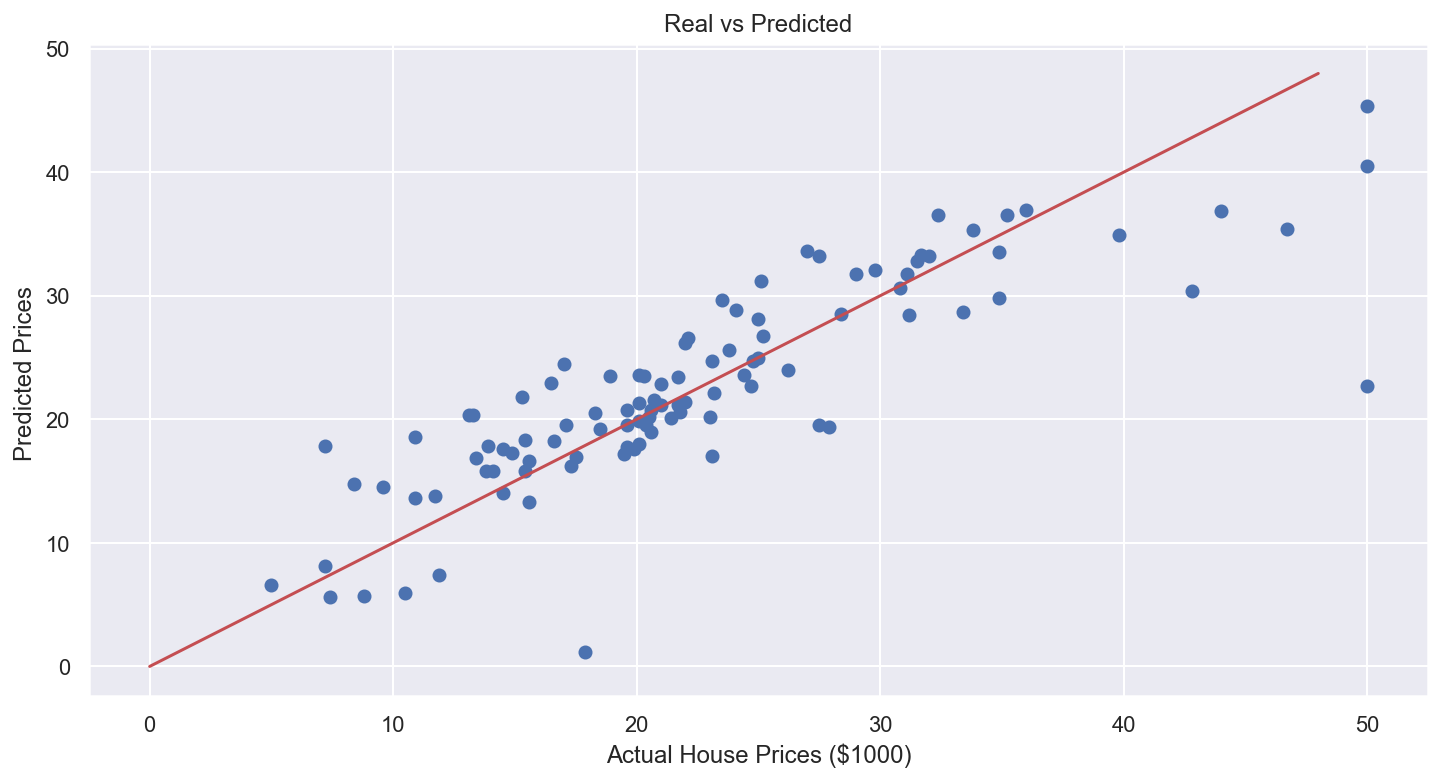

In [19]:
#성능 확인
plt.scatter(y_test,pred_te)
plt.xlabel('Actual House Prices ($1000)')
plt.ylabel('Predicted Prices ')
plt.title('Real vs Predicted')
plt.plot([0,48],[0,48],'r')
plt.show()

In [21]:
#그런데 LSTAT를 사용하는 것이 맞을까? 
X=boston_pd.drop(['LSTAT','PRICE'],axis=1)
y=boston_pd['PRICE']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)

reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#당연히 성능은 나빠진다
#그러나 LSTAT를 사용해야 하는지의 문제는 더 많은 도메인 지식이 필요하다.
pred_tr=reg.predict(X_train)
pred_te=reg.predict(X_test)

rmse_tr=(np.sqrt(mean_squared_error(y_train,pred_tr)))
rmse_te=(np.sqrt(mean_squared_error(y_test,pred_te)))

print('rmse of Train Data : ',rmse_tr)
print('rmse of Test Data : ',rmse_te)

rmse of Train Data :  5.013622047464913
rmse of Test Data :  5.811883973844991
